In [2]:
import quantities as pq
import matplotlib.pyplot as plt
import ConnectionAnalyzer as ca
import neo
import numpy as np
import cPickle

In [3]:
STAPath = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\SiProbe\\Continuous_400_cut_v1\\clusters_run1\\STA_INH\\cell1\\'

In [4]:
# cluster845Data = cPickle.load(open(STAPath+'STSnippets_Cluster_845.pkl', 'rb'))
# cluster243Data = cPickle.load(open(STAPath+'STSnippets_Cluster_243.pkl', 'rb'))
# cluster277Data = cPickle.load(open(STAPath+'STSnippets_Cluster_277.pkl', 'rb'))
# cluster389Data = cPickle.load(open(STAPath+'STSnippets_Cluster_389.pkl', 'rb'))
cluster82Data = cPickle.load(open(STAPath+'STSnippets_Cluster_82.pkl', 'rb'))

In [5]:
# STA_845 = np.mean(cluster845Data.snippets, axis=0)
# STA_SE_845 = np.std(cluster845Data.snippets, axis=0)/np.sqrt(len(cluster845Data.snippets))
# STA_243 = np.mean(cluster243Data.snippets, axis=0)
# STA_SE_243 = np.std(cluster243Data.snippets, axis=0)/np.sqrt(len(cluster243Data.snippets))
# STA_277 = np.mean(cluster277Data.snippets, axis=0)
# STA_SE_277 = np.std(cluster277Data.snippets, axis=0)/np.sqrt(len(cluster277Data.snippets))
# STA_389 = np.mean(cluster389Data.snippets, axis=0)
# STA_SE_389 = np.std(cluster389Data.snippets, axis=0)/np.sqrt(len(cluster389Data.snippets))
STA_82 = np.mean(cluster82Data.snippets, axis=0)
STA_SE_82 = np.std(cluster82Data.snippets, axis=0)/np.sqrt(len(cluster82Data.snippets))

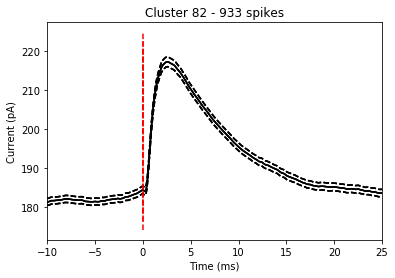

In [8]:
timeAxis = np.linspace(-10, 25, len(STA_82))
plt.figure(1)
plt.plot(timeAxis, STA_82, 'k')
plt.plot(timeAxis, STA_82+STA_SE_82, 'k--')
plt.plot(timeAxis, STA_82-STA_SE_82, 'k--')
plt.plot([0, 0], plt.ylim(), 'r--')
plt.xlim([-10, 25])
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
titleStr82 = 'Cluster 82 - %d spikes' % len(cluster82Data.snippets)
plt.title(titleStr82)
plt.show()
# timeAxis = np.linspace(-10, 25, len(STA_845))
# plt.figure(1)
# plt.plot(timeAxis, STA_845, 'k')
# plt.plot(timeAxis, STA_845+STA_SE_845, 'k--')
# plt.plot(timeAxis, STA_845-STA_SE_845, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr845 = 'Cluster 845 - %d spikes' % len(cluster845Data.snippets)
# plt.title(titleStr845)
# plt.figure(2)
# plt.plot(timeAxis, STA_243, 'k')
# plt.plot(timeAxis, STA_243+STA_SE_243, 'k--')
# plt.plot(timeAxis, STA_243-STA_SE_243, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr243 = 'Cluster 243 - %d spikes' % len(cluster243Data.snippets)
# plt.title(titleStr243)
# plt.figure(3)
# plt.plot(timeAxis, STA_277, 'k')
# plt.plot(timeAxis, STA_277+STA_SE_277, 'k--')
# plt.plot(timeAxis, STA_277-STA_SE_277, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr277 = 'Cluster 277 - %d spikes' % len(cluster277Data.snippets)
# plt.title(titleStr277)
# plt.figure(4)
# plt.plot(timeAxis, STA_389, 'k')
# plt.plot(timeAxis, STA_389+STA_SE_389, 'k--')
# plt.plot(timeAxis, STA_389-STA_SE_389, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr389 = 'Cluster 389 - %d spikes' % len(cluster389Data.snippets)
# plt.title(titleStr389)
# plt.show()

In [18]:
cluster979Data = cPickle.load(open(STAPath+'STSnippets_Cluster_979.pkl', 'rb'))
cluster845Data = cPickle.load(open(STAPath+'STSnippets_Cluster_845.pkl', 'rb'))

In [6]:
import ast
experimentInfoName = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\experiment_101917_v1.info'
with open(experimentInfoName, 'r') as dataFile:
    experimentInfo = ast.literal_eval(dataFile.read())

62


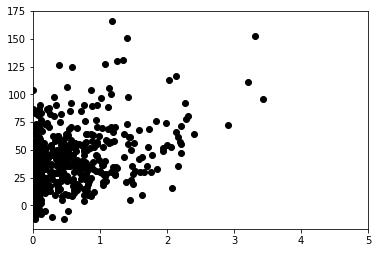

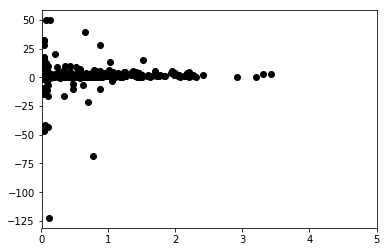

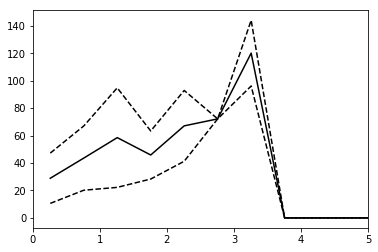

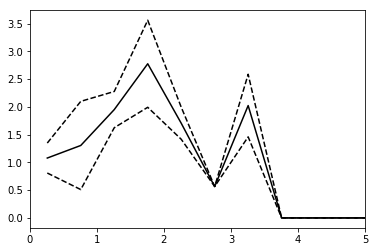

In [15]:
tSpikeBin = int(0.01*experimentInfo['WC']['SamplingRate'])
ampStartBin = int(0.01*experimentInfo['WC']['SamplingRate'])
ampStopBin = int(0.013*experimentInfo['WC']['SamplingRate'])

t_offset = 0.01 # s
t_baseline1 = -1.2 # ms
t_baseline2 = -0.2 # ms
t_peak1 = 1.0 # ms
t_peak2 = 10.0 # ms
peak_window_time = 1.0 # ms
fs = experimentInfo['WC']['SamplingRate']
offset_bin = int(t_offset*fs)
amp_baseline = (int((t_baseline1/1000.0 + t_offset)*fs),  int((t_baseline2/1000.0 + t_offset)*fs))
amp_peak1 = int((t_peak1/1000.0 + t_offset)*fs)
amp_peak2 = int((t_peak2/1000.0 + t_offset)*fs)
sta_peak_bin = int(np.argmax(STA_82[offset_bin:amp_peak2]) + offset_bin)
peak_window = (sta_peak_bin - int(0.5*peak_window_time/1000.0*fs), sta_peak_bin + int(0.5*peak_window_time/1000.0*fs))


maxSpike = -1
ISIs = np.diff(cluster82Data.snippetSpikeTimes)
print len(ISIs[np.where(ISIs < 0.001)])
amps = []
relative_amps = []
previous_amp = 0
for i, snippet_ in enumerate(cluster82Data.snippets):
    if not i:
        previous_amp = np.max(snippet[ampStartBin:ampStopBin]) - snippet[ampStartBin]
        continue
    try:
        snippet = snippet_.flatten().magnitude
    except:
        snippet = snippet_.flatten()
    # amp = np.max(snippet[ampStartBin:ampStopBin]) - snippet[ampStartBin]
    amp = np.median(snippet[peak_window[0]:peak_window[1]]) - np.median(snippet[amp_baseline[0]:amp_baseline[1]])
    amps.append(amp)
    relative_amps.append(amp/previous_amp)
    previous_amp = amp
amps = np.array(amps)
relative_amps = np.array(relative_amps)
minBin = 0.01
maxBin = 10
binSize = 0.5
currentBin = minBin
avgAmp = []
stdAmp = []
avg_relative_amp = []
std_relative_amp = []
samples_relative_amp = []
while currentBin < maxBin:
    selection = np.where((ISIs >= currentBin)*(ISIs < currentBin + binSize))
    if len(selection[0]):
        avgAmp.append(np.mean(amps[selection]))
        stdAmp.append(np.std(amps[selection]))
        avg_relative_amp.append(np.mean(relative_amps[selection]))
        std_relative_amp.append(np.std(relative_amps[selection]))
        samples_relative_amp.append(np.sum(selection[0] >= 0))
    else:
        avgAmp.append(0)
        stdAmp.append(0)
        avg_relative_amp.append(0)
        std_relative_amp.append(0)
        samples_relative_amp.append(1)
    currentBin += binSize
avgAmp = np.array(avgAmp)
stdAmp = np.array(stdAmp)
avg_relative_amp = np.array(avg_relative_amp)
std_relative_amp = np.array(std_relative_amp)
samples_relative_amp = np.array(samples_relative_amp)
ampBins = np.linspace(minBin + 0.5*binSize, maxBin - 0.5*binSize, len(avgAmp))
# amps_ = amps[np.where(amps > 10)]
# ISIs_ = ISIs[np.where(amps > 10)]
plt.figure(1)
plt.plot(ISIs, amps, 'ko')
# plt.semilogx(ISIs, amps, 'ko')
plt.xlim([0.005, 5])
plt.figure(2)
plt.plot(ISIs, relative_amps, 'ko')
# plt.semilogx(ISIs, amps, 'ko')
plt.xlim([0.005, 5])
# plt.ylim([1, 200])
plt.figure(3)
# plt.errorbar(ampBins, avgAmp, stdAmp)
plt.plot(ampBins, avgAmp, 'k-')
plt.xlim([0.005, 5])
plt.plot(ampBins, avgAmp + stdAmp, 'k--')
plt.plot(ampBins, avgAmp - stdAmp, 'k--')
plt.figure(4)
# plt.errorbar(ampBins, avgAmp, stdAmp)
plt.plot(ampBins, avg_relative_amp, 'k-')
plt.xlim([0.005, 5])
plt.plot(ampBins, avg_relative_amp + std_relative_amp/np.sqrt(samples_relative_amp), 'k--')
plt.plot(ampBins, avg_relative_amp - std_relative_amp/np.sqrt(samples_relative_amp), 'k--')
plt.show()

In [ ]:
import os.path
dataFolder = 'C:\\Users\\User\\Desktop\\Continuous_400_cut_v1\\'
misalignmentFilename = os.path.join(dataFolder, 'misaligned_clusters.txt')
misalignedClusters = {}
if os.path.exists(misalignmentFilename):
    with open(misalignmentFilename, 'r') as misalignmentFile:
        for line in misalignmentFile:
            splitLine = line.strip().split('\t')
            try:
                mainCluster = int(splitLine[0])
                mergeClusterStr = splitLine[1].split(',')
                mergeClusters = [int(cluster) for cluster in mergeClusterStr]
                misalignedClusters[mainCluster] = mergeClusters
            except ValueError:
                continue
print misalignedClusters

{0: [48], 82: [210, 331, 377, 387, 389, 435, 447, 449, 451]}


In [30]:
import ConnectionAnalyzer as ca
import ast
clusteringSrcFolder = 'E:\\User\\project_src\\physiology\\Clustering'
experimentInfoName = 'C:\\Users\\User\\Desktop\\experiment_101917.info'
with open(experimentInfoName, 'r') as dataFile:
    experimentInfo = ast.literal_eval(dataFile.read())
SiProbeDataFolder = experimentInfo['SiProbe']['DataBasePath']
clusters = ca.reader.read_clusters(SiProbeDataFolder, clusteringSrcFolder, 'dev', 'good', experimentInfo['SiProbe']['SamplingRate'])

NameError: name 'os' is not defined

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
summaryFile = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\SiProbe\\Continuous_400_cut\\KS_parameter_search\\KS_parameter_sweep_979_reference.csv'
summaryData = np.loadtxt(summaryFile, skiprows=1, unpack=True)

In [63]:
refSpikeCol = 0
thresh1Col = 1
thresh2Col = 2
var1Col = 3
var2Col = 4
SNRCols = [5, 10, 15, 20, 25, 30]
clusterNrCols = [6, 11, 16, 21, 26, 31]
FPCols = [7, 12, 17, 22, 27, 32]
FNCols = [8, 13, 18, 23, 28, 33]
CorrectCols = [9, 14, 19, 24, 29, 34]
figureCount = 0

paramRowLUT = {}
for rowNr in range(len(summaryData[0])):
    rowStr = 'Th_'
    rowStr += str(summaryData[thresh1Col][rowNr])
    rowStr += '_'
    rowStr += str(summaryData[thresh2Col][rowNr])
    rowStr += '_'
    rowStr += str(summaryData[thresh2Col][rowNr])
    rowStr += '_Lam_'
    rowStr += str(summaryData[var1Col][rowNr])
    rowStr += '_'
    rowStr += str(summaryData[var2Col][rowNr])
    rowStr += '_'
    rowStr += str(summaryData[var2Col][rowNr])
    paramRowLUT[rowStr] = rowNr

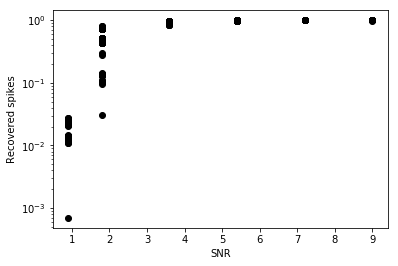

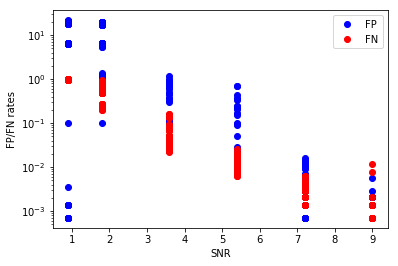

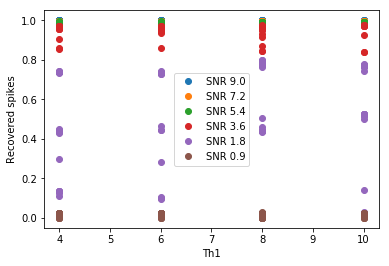

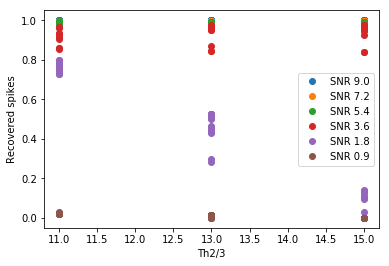

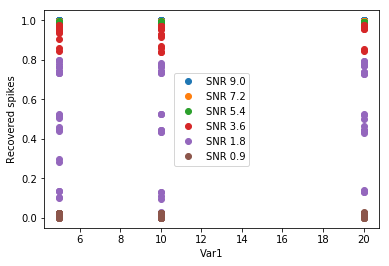

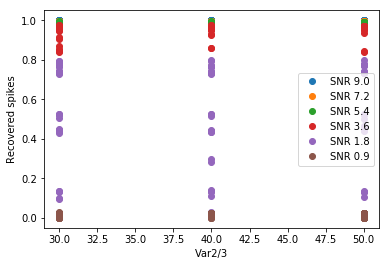

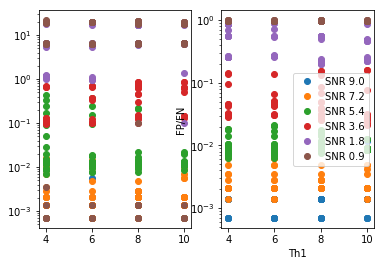

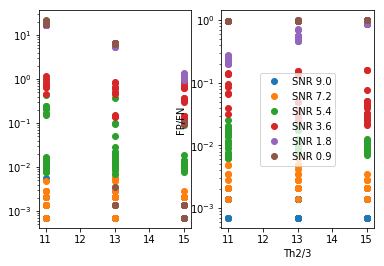

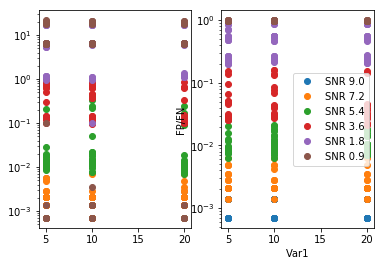

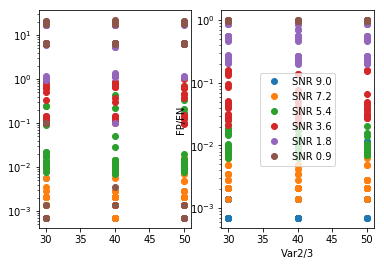

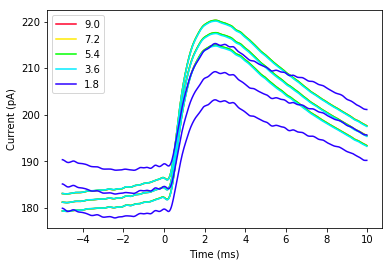

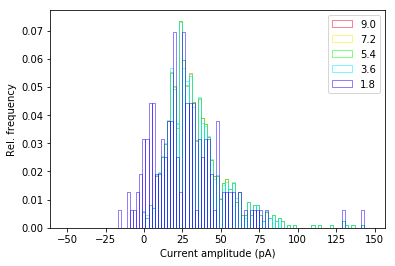

In [64]:
refSpikeNr = summaryData[refSpikeCol][0]

# overview: how many can we recover on avg?
plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    plt.semilogy(summaryData[col][sel], summaryData[CorrectCols[i]][sel]/refSpikeNr, 'ko')
plt.xlabel('SNR')
plt.ylabel('Recovered spikes')

# what are our error rates?
plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[FPCols[i]] > -1.0)
    if not i:
        plt.semilogy(summaryData[col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'bo', label='FP')
        plt.semilogy(summaryData[col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'ro', label='FN')
    else:
        plt.semilogy(summaryData[col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'bo')
        plt.semilogy(summaryData[col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'ro')
plt.legend()
plt.xlabel('SNR')
plt.ylabel('FP/FN rates')

# let's look at this as a function of different threshold/variance parameters
plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.plot(summaryData[thresh1Col][sel], summaryData[CorrectCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Th1')
plt.ylabel('Recovered spikes')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.plot(summaryData[thresh2Col][sel], summaryData[CorrectCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Th2/3')
plt.ylabel('Recovered spikes')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.plot(summaryData[var1Col][sel], summaryData[CorrectCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Var1')
plt.ylabel('Recovered spikes')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.plot(summaryData[var2Col][sel], summaryData[CorrectCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Var2/3')
plt.ylabel('Recovered spikes')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    ax1 = plt.subplot(1,2,1)
    ax1.semilogy(summaryData[thresh1Col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
    ax2 = plt.subplot(1,2,2)
    ax2.semilogy(summaryData[thresh1Col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Th1')
plt.xlabel('Th1')
plt.ylabel('FP/FN')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.subplot(1,2,1)
    plt.semilogy(summaryData[thresh2Col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
    plt.subplot(1,2,2)
    plt.semilogy(summaryData[thresh2Col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Th2/3')
plt.ylabel('FP/FN')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.subplot(1,2,1)
    plt.semilogy(summaryData[var1Col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
    plt.subplot(1,2,2)
    plt.semilogy(summaryData[var1Col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Var1')
plt.ylabel('FP/FN')

plt.figure(figureCount)
figureCount += 1
for i, col in enumerate(SNRCols):
    sel = np.where(summaryData[CorrectCols[i]] > -1.0)
    labelStr = 'SNR %.1f' % summaryData[col][0]
    plt.subplot(1,2,1)
    plt.semilogy(summaryData[var2Col][sel], summaryData[FPCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
    plt.subplot(1,2,2)
    plt.semilogy(summaryData[var2Col][sel], summaryData[FNCols[i]][sel]/refSpikeNr, 'o', label=labelStr)
plt.legend()
plt.xlabel('Var2/3')
plt.ylabel('FP/FN')

optParams = 'Th_4_15_15_Lam_20_50_50'
# scales = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]
scales = [1.0, 0.8, 0.6, 0.4, 0.2]
basePath = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\SiProbe\\Continuous_400_cut\\KS_parameter_search\\'
baseNames = [os.path.join(basePath, 'scale_%.02f', 'refCluster_979') % scale for scale in scales]
plt.figure(figureCount)
figureCount += 1
cmap = plt.get_cmap('gist_rainbow')
nrOfColors = len(scales)
for i, baseName in enumerate(baseNames):
    STAName = optParams + '_STA.npy'
    STASEName = optParams + '_STA_SE.npy'
    STA = np.load(os.path.join(baseName, STAName))
    STA_SE = np.load(os.path.join(baseName, STASEName))
    timeAxis = np.array(range(len(STA)))/50000.0*1000.0 - 5.0
    plt.plot(timeAxis, STA, label=str(summaryData[SNRCols[i]][0]), color=cmap(1.0*i/nrOfColors))
    plt.plot(timeAxis, STA + 2*STA_SE, color=cmap(1.0*i/nrOfColors))
    plt.plot(timeAxis, STA - 2*STA_SE, color=cmap(1.0*i/nrOfColors))
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
plt.figure(figureCount)
figureCount += 1
histRange = -50.0, 150.0
binSize = 2.0
bins = np.arange(histRange[0], histRange[1], binSize)
for i, baseName in enumerate(baseNames):
    STAmplitudesName = optParams + '_STAmplitudes.npy'
    STAmplitudes = np.load(os.path.join(baseName, STAmplitudesName))
    hist_, _ = np.histogram(STAmplitudes, bins)
    hist = hist_*1.0/np.sum(hist_)
    plt.bar(bins[:-1], hist, label=str(summaryData[SNRCols[i]][0]), width=binSize, facecolor='none', edgecolor=[cmap(1.0*i/nrOfColors)]*len(hist), lw=0.5, ls='-')
    # plt.bar(bins[:-1], hist, label=str(summaryData[SNRCols[i]][0]), width=binSize, facecolor=cmap(1.0*i/nrOfColors), alpha=0.5)
plt.legend()
plt.xlabel('Current amplitude (pA)')
plt.ylabel('Rel. frequency')

plt.show()
